# Load Functions

## 0. imports

In [4]:
from reportlab.lib.styles import ParagraphStyle, getSampleStyleSheet
from reportlab.lib.pagesizes import A4
from reportlab.lib import colors
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle, Image
from reportlab.lib.utils import ImageReader
import os
import mne
import json

from utils import *
from eeg import compute_eeg_pipeline, test_eeg_pipeline
from ecg_qc import ecg_qc 
from eda_qc import eda_qc
from rsp_qc import *
from mic_qc import *
from lsl_problem import *
from et_qc import *
from webcam_qc import webcam_qc
import matplotlib

subject = "P5415639"
xdf_filename = f'/Users/bryan.gonzalez/CUNY_subs/sub-{subject}/sub-{subject}_ses-S001_task-CUNY_run-001_mobi.xdf'
# xdf_filename = f'/Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-{subject}/sub-{subject}_ses-S001_task-CUNY_run-001_mobi.xdf'


In [ ]:
subject = 'P5182010'
xdf_filename = f'/Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-{subject}/sub-{subject}_ses-S001_task-CUNY_run-001_mobi.xdf'
video_filename = f'/Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-{subject}/sub-{subject}_task-CUNY_run-001_video.avi'

In [5]:
stim_df = import_stim_data(xdf_filename)

# Get Metrics

## 1. EEG

In [6]:
#Compute the eeg vars
eeg_vars, raw_cleaned, ica, eeg_df = compute_eeg_pipeline(xdf_filename, 
                                                          stim_df=stim_df, 
                                                          task='RestingState')


Creating RawArray with float64 data, n_channels=128, n_times=299990
    Range : 0 ... 299989 =      0.000 ...   299.999 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=299990
    Range : 0 ... 299989 =      0.000 ...   299.999 secs
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.6s finished


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.5s finished


Removed notch frequencies (Hz):
     60.00 : 7482 windows
    120.00 : 7482 windows
    180.00 : 7482 windows
    239.00 : 7482 windows
    240.00 : 7482 windows
    241.00 : 7482 windows
    299.00 : 7482 windows
    300.00 : 7482 windows
    301.00 : 7482 windows
    359.00 : 7482 windows
    360.00 : 7482 windows
    361.00 : 7482 windows
    419.00 : 7482 windows
    420.00 : 7482 windows
    421.00 : 7482 windows
    479.00 : 7482 windows
    480.00 : 7482 windows
    481.00 : 7482 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.4s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Executing RANSAC
This may take a while, so be patient...
Finding optimal chunk size : 25
Total # of chunks: 5
Current chunk:
1
2
3
4
5

RANSAC done!


2025-06-18 10:14:14,695 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': ['E19', 'E119', 'Cz'], 'bad_by_deviation': [], 'bad_by_hf_noise': ['E55', 'E62', 'E71', 'E72', 'E75'], 'bad_by_correlation': ['E31'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [np.str_('E55'), np.str_('E79'), np.str_('E86'), np.str_('E126'), np.str_('E127')], 'bad_all': ['E119', 'E55', np.str_('E126'), np.str_('E127'), 'E71', 'E72', 'E75', 'E31', 'E19', np.str_('E79'), 'Cz', np.str_('E86'), 'E62']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...
Finding optimal chunk size : 32
Total # of chunks: 4
Current chunk:
1
2
3
4

RANSAC done!


2025-06-18 10:15:33,657 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': ['E119', 'Cz', 'E19'], 'bad_by_deviation': [], 'bad_by_hf_noise': ['E72', 'E62'], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [np.str_('E86'), np.str_('E127'), np.str_('E79')], 'bad_all': ['E119', np.str_('E127'), 'E72', 'E19', np.str_('E86'), 'Cz', np.str_('E79'), 'E62']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.0 mm
Computing interpolation matrix from 121 sensor positions
Interpolating 8 sensors


2025-06-18 10:15:34,726 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...
Finding optimal chunk size : 42
Total # of chunks: 3
Current chunk:
1
2
3

RANSAC done!


2025-06-18 10:17:07,529 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': ['E119', 'Cz', 'E19'], 'bad_by_deviation': ['E62'], 'bad_by_hf_noise': ['E72', 'E62'], 'bad_by_correlation': ['E8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [np.str_('E55'), np.str_('E127'), np.str_('E79'), np.str_('E86'), np.str_('E85')], 'bad_all': ['E119', np.str_('E55'), np.str_('E127'), 'E72', 'E19', np.str_('E79'), 'Cz', 'E8', np.str_('E86'), np.str_('E85'), 'E62']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.0 mm
Computing interpolation matrix from 118 sensor positions
Interpolating 11 sensors


2025-06-18 10:17:08,139 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...
Finding optimal chunk size : 42
Total # of chunks: 3
Current chunk:
1
2
3

RANSAC done!


2025-06-18 10:18:03,372 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': ['E119', 'Cz', 'E19'], 'bad_by_deviation': ['E62'], 'bad_by_hf_noise': ['E72', 'E62'], 'bad_by_correlation': ['E8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [np.str_('E55'), np.str_('E127'), np.str_('E126'), np.str_('E86'), np.str_('E79'), np.str_('E85')], 'bad_all': ['E119', np.str_('E55'), np.str_('E127'), np.str_('E126'), 'E72', 'E19', np.str_('E86'), 'Cz', 'E8', np.str_('E79'), np.str_('E85'), 'E62']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.0 mm
Computing interpolation matrix from 117 sensor positions
Interpolating 12 sensors


2025-06-18 10:18:03,982 - pyprep.reference - INFO - Iterations: 3


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...
Finding optimal chunk size : 42
Total # of chunks: 3
Current chunk:
1
2
3

RANSAC done!


2025-06-18 10:18:52,334 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': ['E119', 'Cz', 'E19'], 'bad_by_deviation': ['E62'], 'bad_by_hf_noise': ['E72', 'E62'], 'bad_by_correlation': ['E8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [np.str_('E126'), np.str_('E55'), np.str_('E127'), np.str_('E79'), np.str_('E86'), np.str_('E85')], 'bad_all': ['E119', np.str_('E126'), np.str_('E55'), np.str_('E127'), 'E72', 'E19', np.str_('E79'), 'Cz', 'E8', np.str_('E86'), np.str_('E85'), 'E62']}
2025-06-18 10:18:52,335 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.0 mm
Computing interpolation matrix from 117 sensor positions
Interpolating 12 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.5s finished


Executing RANSAC
This may take a while, so be patient...
Finding optimal chunk size : 64
Total # of chunks: 2
Current chunk:
1
2

RANSAC done!
Found 7 uniquely bad channels:

0 by NaN: []

0 by flat: []

1 by deviation: ['E62']

2 by HF noise: ['E62', 'E72']

1 by correlation: ['E8']

0 by SNR: []

0 by dropout: []

4 by RANSAC: [np.str_('E19'), np.str_('E55'), np.str_('E79'), np.str_('E119')]

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.0 mm
Computing interpolation matrix from 121 sensor positions
Interpolating 8 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transit

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.6s finished


Executing RANSAC
This may take a while, so be patient...
Finding optimal chunk size : 65
Total # of chunks: 2
Current chunk:
1
2

RANSAC done!
Writing /Users/bryan.gonzalez/CUNY_subs/sub-P5415639/sub-P5415639_ses-S001_task-CUNY_run-001_eeg_clean.fif
Closing /Users/bryan.gonzalez/CUNY_subs/sub-P5415639/sub-P5415639_ses-S001_task-CUNY_run-001_eeg_clean.fif
[done]
Bad channels before robust reference: ['E119', 'E55', np.str_('E126'), np.str_('E127'), 'E71', 'E72', 'E75', 'E31', 'E19', np.str_('E79'), 'Cz', np.str_('E86'), 'E62']
Interpolated channels: [np.str_('E119'), np.str_('E55'), 'E72', np.str_('E79'), np.str_('E19'), 'Cz', 'E8', 'E62']
Bad channels after interpolation: []
Using EOG channels: E25, E8
EOG channel index for this subject is: [24  7]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel E25 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward an

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 95 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 95.00
- Lower transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 83.12 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 139 samples (0.139 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.8s finished


Setting up low-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1651 samples (1.651 s)

Percent Good Data: 84.15%
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.4s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.4s


Fitting ICA to data using 129 channels (please be patient, this may take a while)
Omitting 47582 of 299990 (15.86%) samples, retaining 252408 (84.14%) samples.


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.6s finished


Selecting by explained variance: 10 components
Fitting ICA took 10.0s.


In [7]:
eeg_print = {
    'Bad channels before robust reference': eeg_vars['bad_channels_before'], 
    'Interpolated channels': eeg_vars['interpolated_channels'], 
    'Bad channels after interpolation': eeg_vars['bad_channels_after'], 
    'Percent Good?': f"{eeg_vars['percent_good']:.4}%" 
}

### Manual Artifact Removal

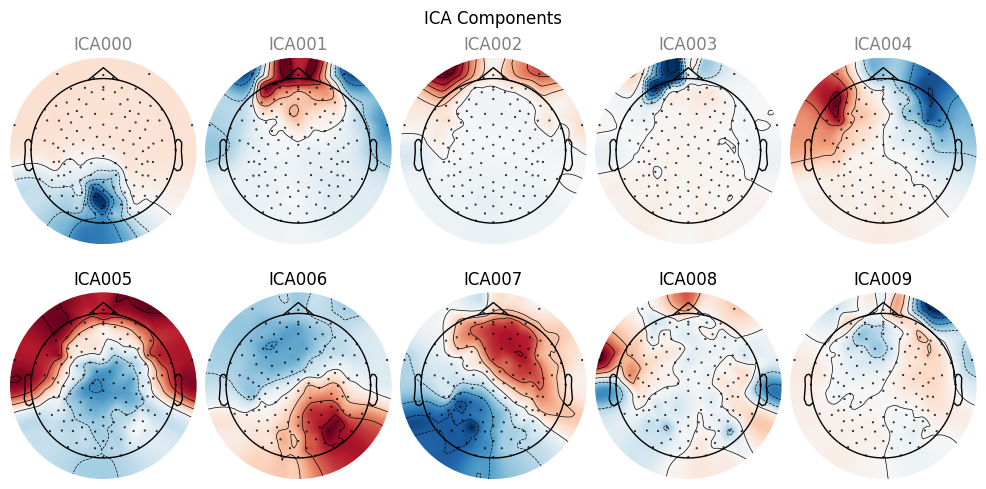

In [20]:
fig = ica.plot_components( title='ICA Components')
# Save the ICA plot

fig.savefig(f'../report_images/sub-{subject}_ica_components.png', bbox_inches='tight')

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
92 matching events found
No baseline correction applied
0 projection i

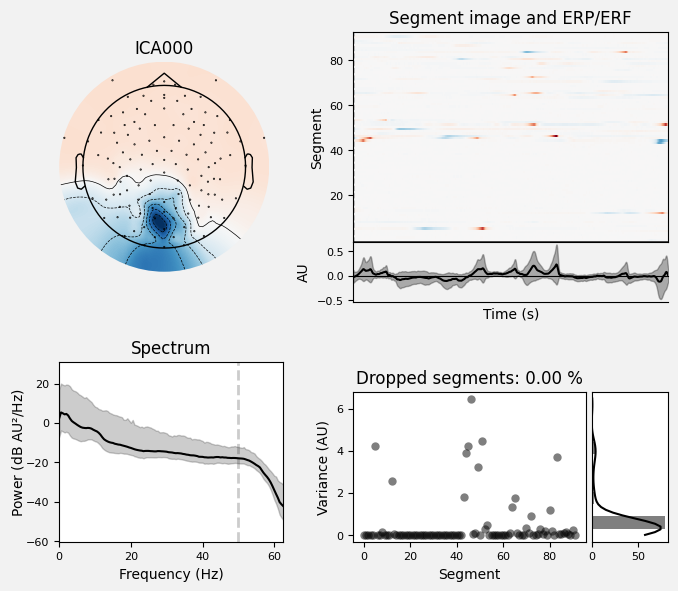

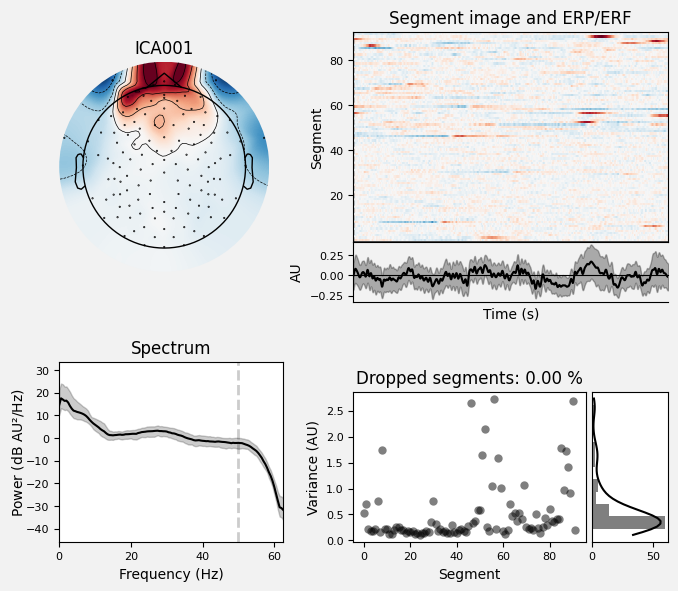

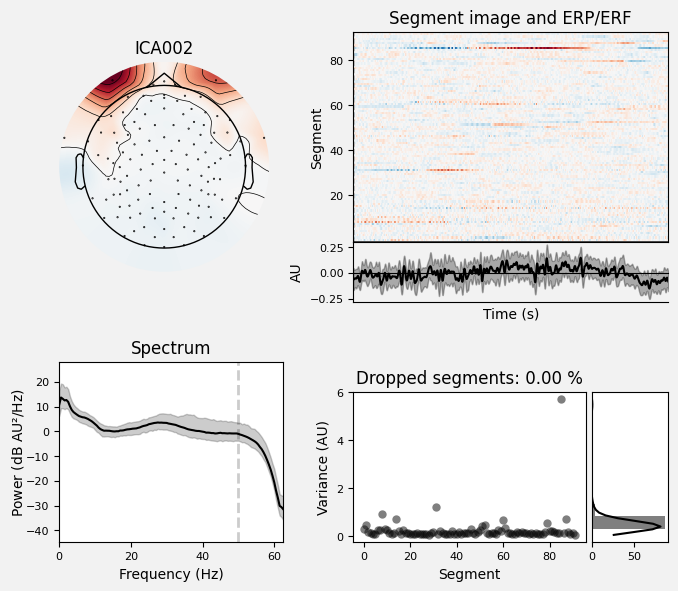

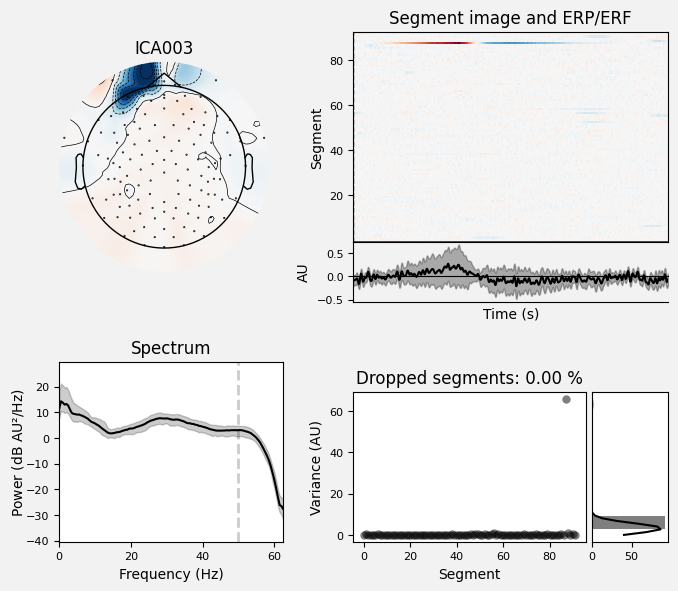

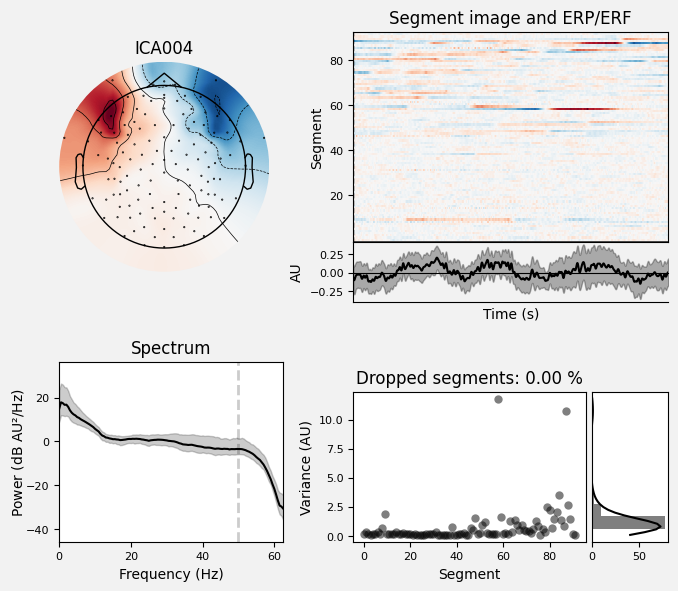

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [11]:
ica.plot_properties(raw_cleaned, picks=[0,1,2,3,4]) # This exact component number probably won't work if you recompute ICA


Applying ICA to Raw instance
    Transforming to ICA space (10 components)
    Zeroing out 4 ICA components
    Projecting back using 129 PCA components


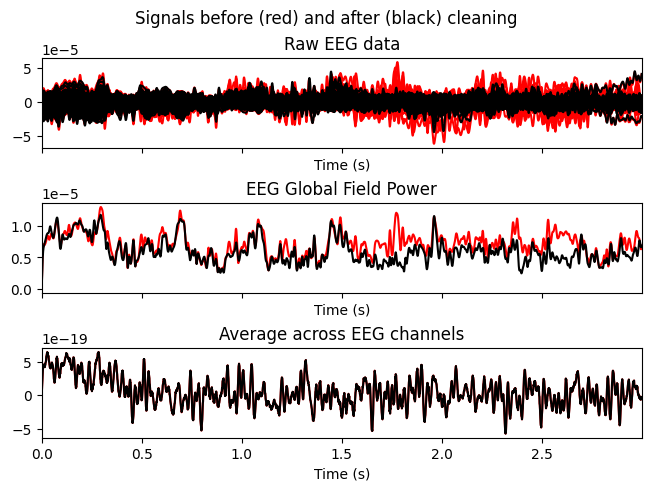

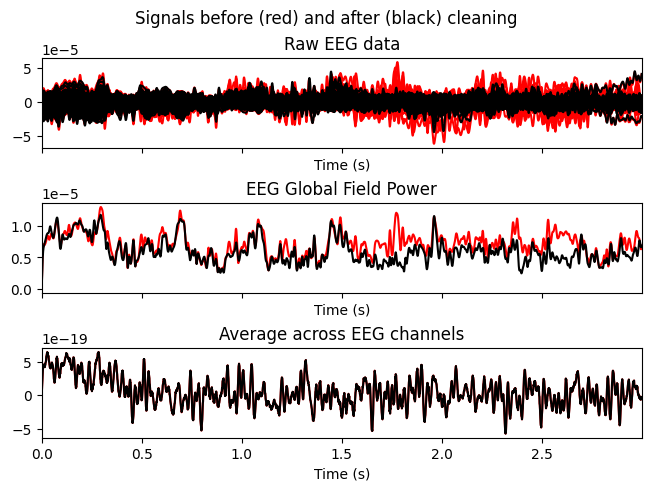

In [13]:
ica.plot_overlay(raw_cleaned, exclude=[0,1, 2,3]) # see what the data would look like if we removed the component

In [14]:
ica.exclude = [0,1,2,3,4] # these are the components that we want to exclude
ica.apply(raw_cleaned)

Applying ICA to Raw instance
    Transforming to ICA space (10 components)
    Zeroing out 5 ICA components
    Projecting back using 129 PCA components


<RawArray | 129 x 299990 (300.0 s), ~295.4 MiB, data loaded>

In [22]:
eeg_vars['components_excluded'] = ica.exclude

### Generate figures

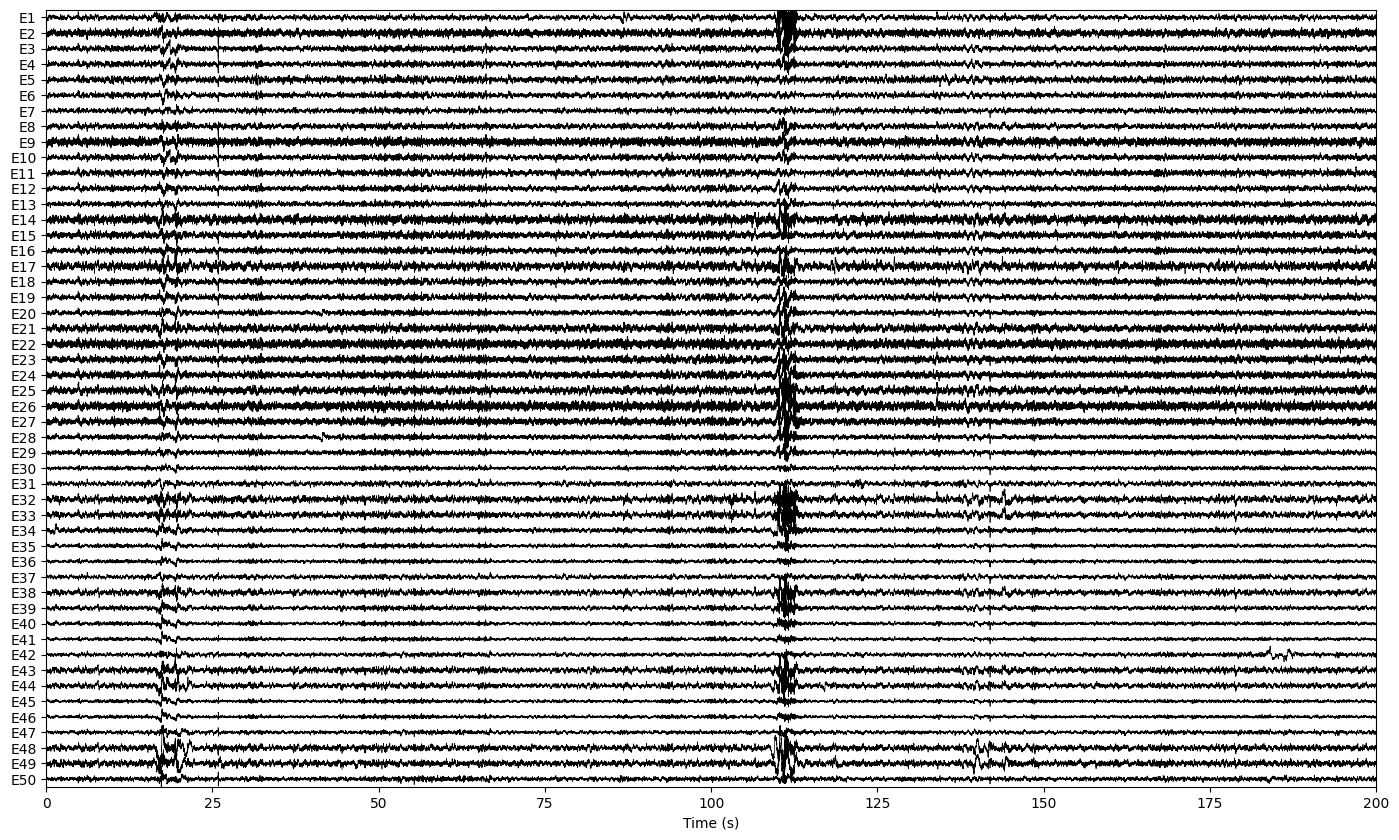

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


In [23]:
raw_cleaned.annotations.delete([i for i, desc in enumerate(raw_cleaned.annotations.description) if desc == 'blink' or desc == 'BAD_muscle'])
fig = raw_cleaned.plot(show_scrollbars=False,
                        show_scalebars=False,events=None, start=0, 
                        duration=200,n_channels=50, scalings=.35e-4, color='k', title='EEG Data after ICA')

fig.savefig(f'../report_images/sub-{subject}_cleaned_eeg.png', dpi=300, bbox_inches='tight')


fig = raw_cleaned.plot_psd(fmax=50, average=False, show=True)
fig.savefig(f'../report_images/sub-{subject}_cleaned_eeg_psd.png', dpi=300, bbox_inches='tight')

In [ ]:
raw_cleaned_pathname = '/'.join(xdf_filename.split('/')[:-1]) + f'/sub-{subject}_ses-S001_task-CUNY_run-001_eeg_clean.fif'

raw_cleaned.save(raw_cleaned_pathname, overwrite=True)

## 2. ECG

In [ ]:
[ecg_vars, ecg_plt, ps_df] = ecg_qc(xdf_filename = xdf_filename, stim_df = stim_df, task= 'RestingState')


In [ ]:
ecg_vars.keys()

In [ ]:
ecg_print = {
    "Effective sampling rate": f'{ecg_vars["sampling_rate"]:.4f} Hz', 
    "Signal to Noise Ratio": f'{ecg_vars["SNR"]:.4f} dB',
    "Average heart rate": f'{ecg_vars["average_heart_rate"]:.4f} bpm',
    "Kurtosis signal quality index (kSQI)": f'{ecg_vars["kurtosis_SQI"]:.4f}',
    "Power spectrum distribution (pSQI)": f'{ecg_vars["power_spectrum_distribution_SQI"]:.4f} mV²/Hz',
    "Relative power in baseline (basSQI)": f'{ecg_vars["relative_baseline_power_sqi"]:.4f}%'
}

In [ ]:
ecg_print

## 3. EDA

In [ ]:
[eda_vars, eda_plt1, eda_plt2, ps_df] = eda_qc(xdf_filename = xdf_filename, stim_df = stim_df, task= 'RestingState')

In [ ]:
eda_vars.keys()

In [ ]:
eda_print = {
    "Effective sampling rate": f'{eda_vars["sampling_rate"]:.4f} Hz', 
    "Signal to noise ratio": f'{eda_vars["snr"]:.4f} dB',
    "Signal integrity check": f'{eda_vars["signal_integrity_check"]:.4f}%',
    "Average skin conductance level": f'{eda_vars["average_scl"]:.4f} mS',
    "Skin conductance level std": f'{eda_vars["scl_sd"]:.4f} mS',
    "Skin conductance level coefficient of variation": f'{eda_vars["scl_cv"]:.4f}%',
    "Average amplitude of skin conductance response": f'{eda_vars["average_scr_amplitude"]:.4f} mS',
    "Skin conductance response validity": f'{eda_vars["sc_validity"]:.4f} %' # this will need to be changed to [scr_validity]
}

## 4. RSP

In [ ]:
rsp_vars, ps_df = rsp_qc(xdf_filename = xdf_filename, stim_df = stim_df)

In [ ]:
rsp_print = {
    "Effective sampling rate": f'{rsp_vars["sampling_rate"]:.4f} Hz', 
    "Signal to noise ratio": f'{rsp_vars["rsp_snr"]:.4f} dB',
    "Breath amplitude mean": f'{rsp_vars["breath_amplitude_mean"]:.4f} V',
    "Breath amplitude std": f'{rsp_vars["breath_amplitude_std"]:.4f} V',
    "Breath amplitude range": f'{rsp_vars["breath_amplitude_range"]} V',
    "Respiration rate mean": f'{rsp_vars["rsp_rate_mean"]:.4f} bpm',
    "Respiration rate std": f'{rsp_vars["rsp_rate_std"]:.4f} bpm', 
    "Respiration rate range": f'{rsp_vars["rsp_rate_range"]} bpm', 
    "Peak to peak interval mean": f'{rsp_vars["ptp_mean"]:.4f} sec', 
    "Peak to peak interval std": f'{rsp_vars["ptp_std"]:.4f} sec', 
    "Peak to peak interval range": f'{rsp_vars["ptp_range"]} sec', 
    "Baseline drift": f'{rsp_vars["baseline_drift"]:.4f} V', 
    "Autocorrelation at typical breath cycle": f'{rsp_vars["autocorrelation"]:.4f}'
}

In [ ]:
rsp_print

## 5. Mic

In [ ]:
mic_vars, mic_df = mic_qc(xdf_filename = xdf_filename, stim_df = stim_df)

In [ ]:
mic_print = {
    "Effective sampling rate": f'{mic_vars["sampling_rate"]:.4f} Hz', 
    "Difference between .wav file and lsl timestamps durations": f'{mic_vars["lsl_wav_duration_diff"]:.4f} sec', 
    "Number of NaN's": f'{mic_vars["num_NaN"]}',
    "Percent of NaN's": f'{mic_vars["percent_NaN"]:.4f}%',
    "Mic samples first quartile": f'{mic_vars["quan25"]:.4f}',
    "Mic samples third quartile": f'{mic_vars["quan75"]:.4f}',
    "Mic samples std": f'{mic_vars["std"]:.4f}',
    "Mic samples min": f'{mic_vars["min"]:.4f}',
    "Mic samples max": f'{mic_vars["max"]:.4f}'
}

## 6. Webcam

In [ ]:
webcam_vars, cam_df = webcam_qc(xdf_filename=xdf_filename,
                video_file=video_filename, task='RestingState')

In [ ]:
webcam_vars

In [ ]:
webcam_print = {
    "Effective sampling rate": f'{webcam_vars["sampling_rate"]:.4f} Hz', 
    "Collected full resting state": webcam_vars["collected_full_RestingState"], 
    "Percent of frames with face detected": f'{webcam_vars["face_perc"]:.4%}'
}

In [ ]:
webcam_print

## 7. ET

In [ ]:
et_vars, et_df = et_qc(xdf_filename = xdf_filename, stim_df = stim_df)

In [ ]:
et_print = {
    "Effective sampling rate": f'{et_vars["sampling_rate"]:.4f} Hz', 
    "Flag: all coordinates have the same % validity within each measure (LR, gaze point/origin/diameter)": et_vars["flag1"], 
    "Flag: % of NaNs is the same between coordinate systems (UCS and TBCS (gaze origin) and between UCS and display area (gaze point))": et_vars["flag2"],
    "Mean difference in percent valid data between right and left eyes": f'{et_vars["LR_mean_diff"]:.4f}%',
    "Percent of data with gaze point differences of over 0.2 mm": f'{et_vars["percent_over02"]:.4f}%'
}

## Stream Durations 

### functions are in utils.py (but should be called in the report)

In [ ]:
df_map = {
    'et': et_df,
    'ps': ps_df,
    'mic': mic_df,
    'cam': cam_df
    }
    # 'eeg': eeg_df

In [ ]:
duration_vars = {"Durations of each modality + comparison to expected duration:": 
    get_durations(xdf_path=xdf_filename, task='Experiment', df_map = df_map, stim_df = stim_df)}

In [ ]:
duration_print = duration_vars

In [ ]:
# i wont run these but they are here for reference
# get_durations('RestingState', xdf_filename)
# get_durations('CampFriend', xdf_filename)
# get_durations('SocialTask', xdf_filename)
# whole_durations(xdf_filename)

## LSL Problem

In [ ]:
lsl_vars = lsl_problem_qc(xdf_filename, df_map = df_map, stim_df = stim_df)

In [ ]:
lsl_print = {
    "Percent of missing data in entire experiment": lsl_vars["percent_loss"],
    "Percent of missing data before social task offset": lsl_vars["loss_before_social_task"]
}

# I try from scratch

In [ ]:
# Modalities and corresponding data
metric_names = ["ECG", "EDA", "RSP", "MIC", "ET", "WEBCAM", "Stream Durations", "LSL"]
metrics_list = [ecg_vars, eda_vars, rsp_vars, mic_vars, et_vars, webcam_vars, duration_vars, lsl_vars]

# PDF structure
pdf_path = "output_report.pdf"
doc = SimpleDocTemplate(pdf_path, pagesize=A4)
elements = []
styles = getSampleStyleSheet()

# Define subtitle style if not already done
subtitle_style = ParagraphStyle(
    name="Subtitle",
    parent=styles["Heading2"],
    fontSize=14,
    leading=16,
    textColor="gray",
    spaceAfter=12,
    alignment=1  # Centered
)


elements.append(Paragraph(f"Subject Report: {subject}", styles["Title"]))
elements.append(Paragraph(f"Collection Date: {get_collection_date(xdf_filename)}", subtitle_style))
elements.append(Spacer(1, 12))

# Format each metrics dict
for name, metrics in zip(metric_names, metrics_list):
    elements.append(Paragraph(name, styles["Heading2"]))
    for k, v in metrics.items():
        if isinstance(v, pd.DataFrame):
            data = [v.columns.tolist()] + v.values.tolist()  # Include headers
            table = Table(data, repeatRows=1)
            table.hAlign = 'LEFT'

            table.setStyle(TableStyle([
                ('BACKGROUND', (0, 0), (-1, 0), colors.lightgrey),
                ('GRID', (0, 0), (-1, -1), 0.5, colors.black),
                ('FONTNAME', (0, 0), (-1, -1), 'Helvetica'),
                ('FONTSIZE', (0, 0), (-1, -1), 10),
                ('ALIGN', (0, 0), (-1, -1), 'LEFT'),
            ]))
            elements.append(Paragraph(k, styles['Normal']))
            elements.append(Spacer(1, 12))

            elements.append(table)
            elements.append(Spacer(1, 12))
        else:
            text = f"<b>{k}:</b> {v:.4f}" if isinstance(v, float) else f"<b>{k}:</b> {v}"
            elements.append(Paragraph(text, styles["Normal"]))
    elements.append(Spacer(1, 12))

    # images
    folder = "report_images"
    image_keyword = name.lower()
    if os.path.exists(folder):
        for fname in sorted(os.listdir(folder)):
            if image_keyword in fname.lower() and subject in fname:
                image_path = os.path.join(folder, fname)
                img = Image(image_path, width=400, height=200)  # Adjust size as needed
                elements.append(img)


doc.build(elements)
print(f'PDF created: {pdf_path}')

In [ ]:
from IPython.display import FileLink

FileLink("output_report.pdf")

# Second Report with formatting

In [ ]:
# Modalities and corresponding data
metric_names = ["ECG", "EDA", "RSP", "MIC","ET", "WEBCAM", "Stream Durations", "LSL"]
metrics_list = [ecg_print, eda_print, rsp_print, mic_print, et_print, webcam_print, duration_print, lsl_print]
# metric_names = ["ECG", "EDA","WEBCAM"]
# metrics_list = [ecg_print, eda_print,  webcam_print]

# PDF structure
parent_folder = xdf_filename.split('mobi')[0]
pdf_path = f"{parent_folder}QCReport.pdf"
doc = SimpleDocTemplate(pdf_path, pagesize=A4)
elements = []
styles = getSampleStyleSheet()

# Define subtitle style if not already done
subtitle_style = ParagraphStyle(
    name="Subtitle",
    parent=styles["Heading2"],
    fontSize=14,
    leading=16,
    textColor="gray",
    spaceAfter=12,
    alignment=1  # Centered
)

# page number function
def add_page_number(canvas, doc):
    page_num = f'{canvas.getPageNumber()}'
    canvas.setFont("Helvetica", 9)
    canvas.drawRightString(570, 20, page_num)  # (x, y) from bottom-left


elements.append(Paragraph(f"Subject Report: {subject}", styles["Title"]))
elements.append(Paragraph(f"Collection Date: {get_collection_date(xdf_filename)}", subtitle_style))
elements.append(Spacer(1, 12))

# Format each metrics dict
for name, metrics in zip(metric_names, metrics_list):
    elements.append(Paragraph(name, styles["Heading2"]))
    for k, v in metrics.items():
        if isinstance(v, pd.DataFrame):
            data = [v.columns.tolist()] + v.values.tolist()  # Include headers
            table = Table(data, repeatRows=1)
            table.hAlign = 'LEFT'

            table.setStyle(TableStyle([
                ('BACKGROUND', (0, 0), (-1, 0), colors.lightgrey),
                ('GRID', (0, 0), (-1, -1), 0.5, colors.black),
                ('FONTNAME', (0, 0), (-1, -1), 'Helvetica'),
                ('FONTSIZE', (0, 0), (-1, -1), 10),
                ('ALIGN', (0, 0), (-1, -1), 'LEFT'),
            ]))
            elements.append(Paragraph(k, styles['Normal']))
            elements.append(Spacer(1, 12))

            elements.append(table)
            elements.append(Spacer(1, 12))
        else:
            text = f"<b>{k}:</b> {v}" if isinstance(v, float) else f"<b>{k}:</b> {v}"
            elements.append(Paragraph(text, styles["Normal"]))
    elements.append(Spacer(1, 12))

    # images
    folder = "report_images"
    image_keyword = name.lower()
    if os.path.exists(folder):
        for fname in sorted(os.listdir(folder)):
            if image_keyword in fname.lower() and subject in fname:
                image_path = os.path.join(folder, fname)

                # get dimensions
                image_reader = ImageReader(image_path)
                orig_width, orig_height = image_reader.getSize()
                print(orig_width, orig_height)
                if orig_width > 3000:
                    img = Image(image_path, width=orig_width/9, height=orig_height/7)
                elif orig_width > 1400:
                    img = Image(image_path, width=orig_width/3, height=orig_height/3)
                else:
                    img = Image(image_path, width=orig_width/2, height=orig_height/2)  # Adjust size as needed
                elements.append(img)
                elements.append(Spacer(1, 12))



doc.build(elements, onFirstPage = add_page_number, onLaterPages = add_page_number)
print(f'PDF created: {pdf_path}')

In [ ]:
from IPython.display import FileLink

FileLink(pdf_path)

In [ ]:
metric_names = ["ECG", "EDA","WEBCAM"]
metrics_list = [ecg_print, eda_print,  webcam_print]

for name, metrics in zip(metric_names, metrics_list):
    print(name)
    image_keyword = name.lower()

    if os.path.exists(folder):
        for fname in sorted(os.listdir(folder)):
            if image_keyword in fname.lower() and subject in fname:
                image_path = os.path.join(folder, fname)

                # get dimensions
                image_reader = ImageReader(image_path)
                orig_width, orig_height = image_reader.getSize()
                print(fname, orig_width, orig_height)

# Report

## 1. Set up Document

In [ ]:


# Set up the document
doc = SimpleDocTemplate("example_report.pdf", pagesize=LETTER)
styles = getSampleStyleSheet()
story = []

# Add a title
title = Paragraph(f"Subject Report: {subject}", styles["Title"])
story.append(title)
story.append(Spacer(1, 20))

# Add a paragraph
text = f"""
Collection Date: {get_collection_date(xdf_filename)} 
"""
paragraph = Paragraph(text, styles["BodyText"])
story.append(paragraph)
story.append(Spacer(1, 20))




In [ ]:
# Add a subtitle
subtitle = Paragraph(f"EEG", styles["Heading2"], )
story.append(subtitle)
story.append(Spacer(1, 5))

# Add a paragraph
text = f"""
Data preprocessed by performing <b>line noise removal</b>, <b>robust referencing</b>, and <b>bad channel detection/interpolation</b> using PyPrep pipeline. First, the pipeline applies a notch filter at 60 Hz and its harmonics to remove power line noise. Then, it performs <b>robust average referencing</b>, where it detects bad channels, interpolates them using surrounding signals, and computes a median-based reference across EEG channels. This ensures a stable reference even in the presence of noisy electrodes. The final output is a cleaned EEG dataset with a consistent reference, ready for further analysis.
"""

paragraph = Paragraph(text, styles["BodyText"], )
story.append(paragraph)
story.append(Spacer(1, 20))

## Computer the EEG variables (will take time)

In [ ]:
# add an image
from reportlab.lib.units import inch
from reportlab.platypus import Image
image = Image("/Users/camilla.strauss/Desktop/MOBI_QC/src/MOBI_QC/report_images/P5287460_rsp_peaktopeak.png", 7*inch, 3*inch)
image.hAlign = 'CENTER'
story.append(image)

In [ ]:
story.append(Spacer(1, 20))

In [ ]:



# Define the table style to make all borders white
style = TableStyle([
    ('GRID', (0,0), (-1,-1), 1, colors.white),  # All grid lines white
    ('BOX', (0,0), (-1,-1), 1, colors.white),   # Outer box white
    ('INNERGRID', (0,0), (-1,-1), 1, colors.white)  # Inner grid white
])
# Create the table
# table = Table(data, style=style)
# Apply style
#table.setStyle(style)
# story.append(table)
#story.append(Spacer(1, 20))

In [ ]:
# Build the PDF
doc.build(story)

In [ ]:
table